Available Data and Analysis

Household Emission and Emission distribution among different income groups in Germany
Paper Source - https://e-docs.geo-leo.de/bitstream/handle/11858/9323/JIEC_JIEC13045.pdf?sequence=1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

data = pd.read_excel('/Volumes/Mayank HDD/jiec13045-sup-0003-suppmat.xlsx', sheet_name=3)
data.head()


,Household Income Group (Euro/month),Product Groups,FD_Mean,CF_Mean,LF_Mean,MF_Mean,WF_Mean
0,Average,Animal-Based Food,780.997060,486.707586,1410.924699,1.123060,15.605248
1,Average,Vegetable-Based Food,1500.034105,646.985192,1866.292901,1.888000,73.818499
2,Average,Clothing and Footwear,805.647712,473.977061,683.637877,0.918440,11.983315
3,Average,Housing and Renovation,3923.538450,500.784533,982.286989,0.827627,2.236570
4,Average,Electricity and Utilities,1333.428723,3047.181573,957.932328,1.442762,9.417923


In [31]:
# Add a new column based on income categories
combined_category = []
for x,y in enumerate(data['Household Income Group (Euro/month)']):
    if y in ['Below 900', '900-1,300', '1,300-1,500']:
        combined_category.append('Low Income')
    elif y in ['1,500-1,700', '1,700-2,000', '2,000-2,600', '2,600-3,600', '3,600-5,000', '5,000-7,500']:
        combined_category.append('Medium Income')
    elif y in ['7,500-10,000', '10,000-18,000']:
        combined_category.append('High Income')
    else:
        combined_category.append(data['Household Income Group (Euro/month)'][x])

data['CombinedCategory'] = combined_category
filtered_data = data[data['CombinedCategory'] != 'Average']
income_groups = set(filtered_data['CombinedCategory'])
income_groups

{'High Income', 'Low Income', 'Medium Income'}

Product Groups
Air Transportation               69.595091
Animal-Based Food               486.252751
Clothing and Footwear           446.266549
Electricity and Utilities      3018.740805
Furniture and Appliances        360.572147
Health and Personal Care        545.359466
Housing and Renovation          495.248959
Media and Learning              208.117159
Package Holiday                 283.984691
Recreation and Services         324.917704
Transportation and Vehicles    1981.307205
Vegetable-Based Food            643.257438
Name: CF_Mean, dtype: float64


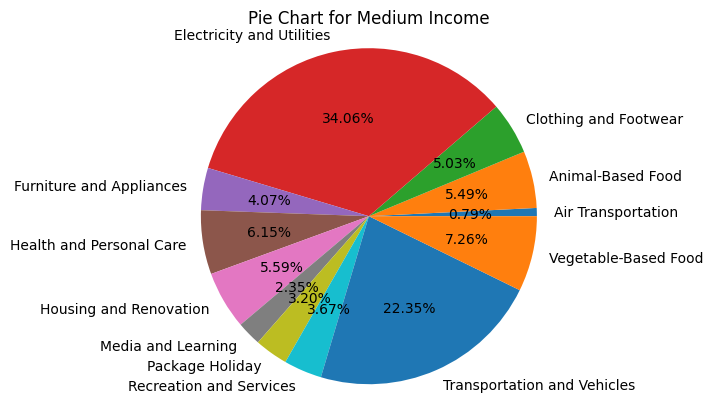

Product Groups
Air Transportation              382.719473
Animal-Based Food               557.946527
Clothing and Footwear           883.176766
Electricity and Utilities      4041.881206
Furniture and Appliances        715.648087
Health and Personal Care       1163.156706
Housing and Renovation          580.836152
Media and Learning              400.852125
Package Holiday                 630.234752
Recreation and Services         621.461496
Transportation and Vehicles    2927.829337
Vegetable-Based Food            765.692571
Name: CF_Mean, dtype: float64


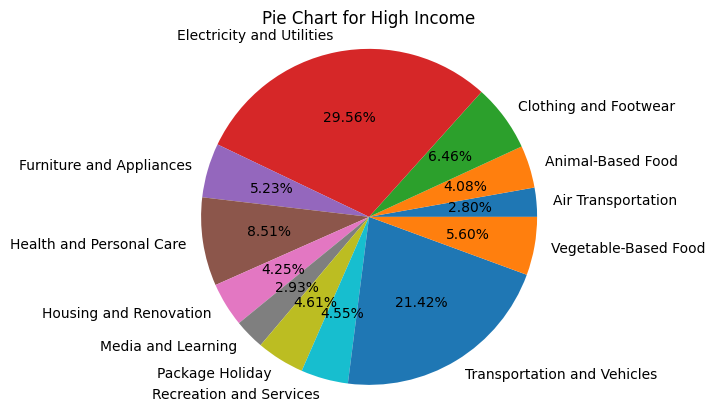

Product Groups
Air Transportation               41.850261
Animal-Based Food               471.260046
Clothing and Footwear           289.850466
Electricity and Utilities      2254.620286
Furniture and Appliances        217.279156
Health and Personal Care        383.589295
Housing and Renovation          503.810050
Media and Learning              147.692882
Package Holiday                 118.224580
Recreation and Services         210.739183
Transportation and Vehicles     944.948843
Vegetable-Based Food            606.465921
Name: CF_Mean, dtype: float64


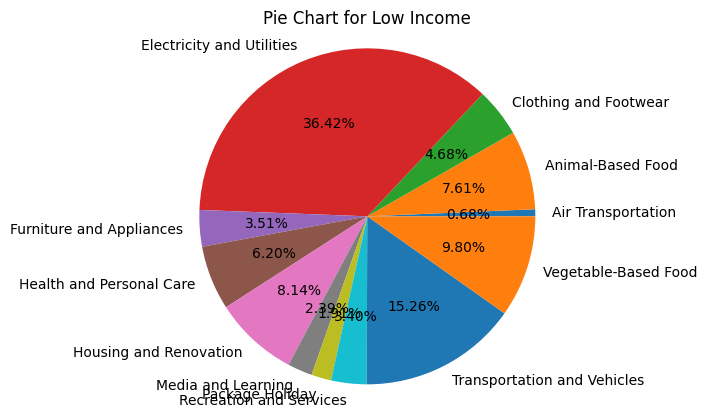

In [52]:
for income_group in income_groups:
    plt.figure()
    plt.title(f'Pie Chart for {income_group}')

    # Filter data for the current income group
    seperate_income_data = filtered_data[filtered_data['CombinedCategory'] == income_group]
    average_seperate_income_data = seperate_income_data.groupby('Product Groups')['CF_Mean'].mean()
    print(average_seperate_income_data)
    labels = average_seperate_income_data.reset_index()['Product Groups']

    # Create the pie chart
    plt.pie(average_seperate_income_data, labels=labels, autopct='%1.2f%%')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

    plt.show()

#Population Germany from year 1990 - 2022 

Data Source - https://www.destatis.de/EN/Themes/Society-Environment/Population/Current-Population/_node.html

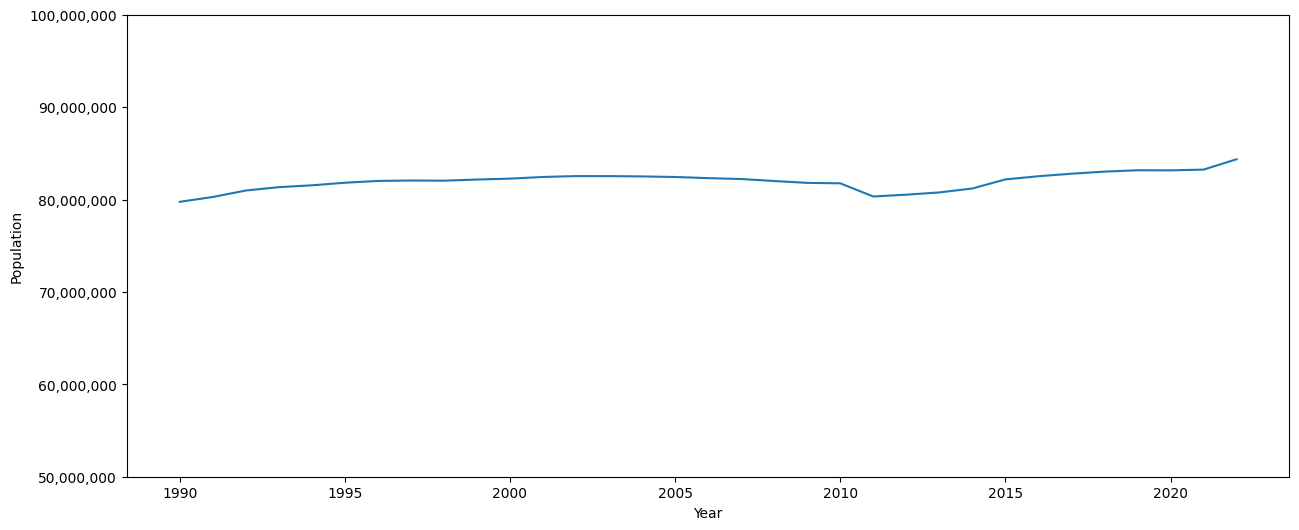

In [33]:

population_germany_file = "/Volumes/Mayank HDD/PAM/population.csv"
population_list = []

def get_years(date):
    year = int(date.split('.')[2])

    return year

df = pd.read_csv(population_germany_file, delimiter=";")

df['Date'] = df['Date'].apply(get_years)
df = df[40:]
plt.figure(figsize=(15, 6))


# Plotting the lines
plt.plot(df['Date'], df['Population'], label='low income')

plt.ylim(50000000, 100000000)

# Create a formatter to display y-axis labels in hundreds with three digits
formatter = mticker.StrMethodFormatter("{x:,.0f}")

# Set the formatter for the y-axis tick labels
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Population')


# Displaying the graph
plt.show()

In [34]:
#get the total Co2 emission
mean_values = data.groupby(['CombinedCategory','Product Groups'])['CF_Mean'].mean()

#convert the categorized value to dict
mean_values = mean_values.to_frame()
total_co2_emission_by_category = mean_values.groupby('CombinedCategory')['CF_Mean'].sum()
total_co2_emission_by_category = round(total_co2_emission_by_category/1000)
total_co2_emission_All = total_co2_emission_by_category['High Income'] +total_co2_emission_by_category['Low Income'] + total_co2_emission_by_category['Medium Income']
#in Million tonnes
total_co2_emission_All

29.0

Total Number of Households

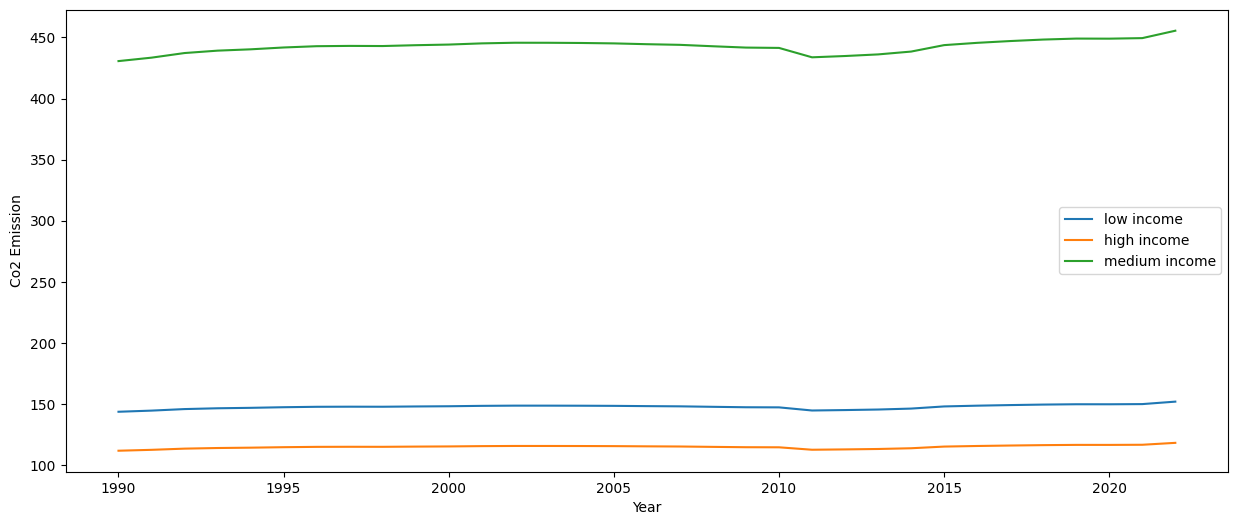

In [35]:

low_income_household_number = 11680000
medium_income_household_number =  24320000
high_income_household_number = 4000000

low_income_household_number_percentage = 30
medium_income_household_number_percentage = 60
high_income_household_number_percentage = 10

co2_emission_low_income = [(0.3*x*6)/1000000 for x in df['Population']]
co2_emission_high_income = [(0.1*x*14)/1000000 for x in df['Population']]
co2_emission_medium_income = [(0.6*x*9)/1000000 for x in df['Population']]
co2_emission_total_current = [x + y  + z for x, y, z in zip(co2_emission_low_income, co2_emission_high_income, co2_emission_medium_income )]

plt.figure(figsize=(15, 6))

# Plotting the lines
plt.plot(df['Date'], co2_emission_low_income, label='low income')
plt.plot(df['Date'], co2_emission_high_income, label='high income')
plt.plot(df['Date'], co2_emission_medium_income, label='medium income')

# Create a formatter to display y-axis labels in hundreds with three digits
formatter = mticker.StrMethodFormatter("{x:,.0f}")

# Set the formatter for the y-axis tick labels
plt.gca().yaxis.set_major_formatter(formatter)
# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Co2 Emission')
plt.legend()

# Displaying the graph
plt.show()


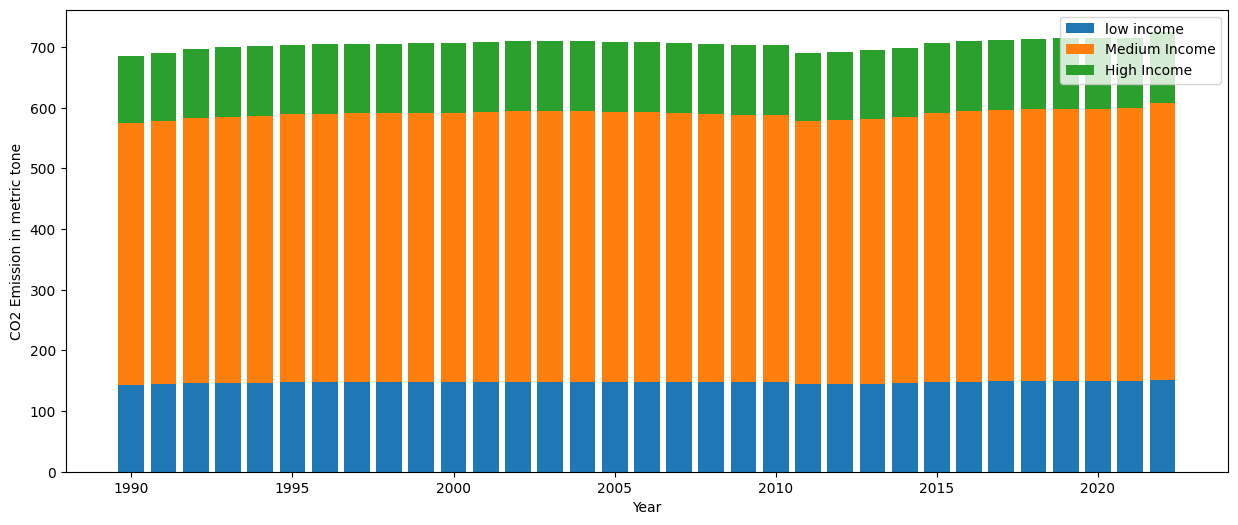

In [36]:
import numpy as np


# Creating the stacked bar chart
plt.figure(figsize=(15, 6))

# Plotting the bars
plt.bar(df['Date'], co2_emission_low_income, label='low income')
plt.bar(df['Date'], co2_emission_medium_income, label='Medium Income', bottom=co2_emission_low_income)
plt.bar(df['Date'], co2_emission_high_income, label='High Income', bottom=np.array(co2_emission_low_income) + np.array(co2_emission_medium_income))


# Create a formatter to display y-axis labels in hundreds with three digits
formatter = mticker.StrMethodFormatter("{x:,.0f}")

# Set the formatter for the y-axis tick labels
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('CO2 Emission in metric tone')
plt.legend()

# Displaying the graph
plt.show()

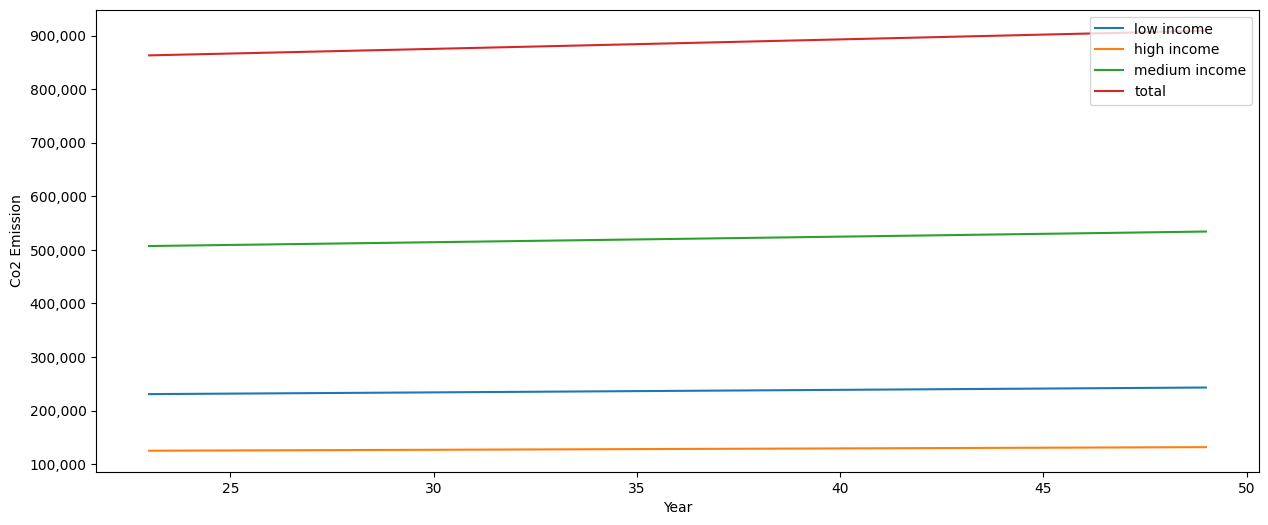

In [37]:
#parameters
current_population = df[-1:]['Population']
current_population = current_population.iloc[0]
population_growth_rate = 0.2

#### amount of co2 emitted by household (in tonnes)
low_income_households = 9.1
medium_income_households = 10
high_income_households = 14.8

low_income_household_number_prediction = []
high_income_household_number_prediction = []
medium_income_household_number_prediction = []

for year in range(2023, 2050):
    current_population += ((population_growth_rate/100)*current_population)
    low_income_household_number_prediction.append(round((low_income_household_number_percentage/100) * current_population))
    high_income_household_number_prediction.append(round((high_income_household_number_percentage/100) * current_population))
    medium_income_household_number_prediction.append(round((medium_income_household_number_percentage/100) * current_population))

co2_emission_low_income = [(low_income_households*x)/1000 for x in low_income_household_number_prediction]

co2_emission_high_income = [(high_income_households*x)/1000 for x in high_income_household_number_prediction]

co2_emission_medium_income = [(medium_income_households*x)/1000 for x in medium_income_household_number_prediction]
co2_emission_year = [x for x in range(23, 50)]
co2_emission_total = [x + y  + z for x, y, z in zip(co2_emission_low_income, co2_emission_high_income, co2_emission_medium_income )]


plt.figure(figsize=(15, 6))

# Plotting the lines
plt.plot(co2_emission_year, co2_emission_low_income, label='low income')
plt.plot(co2_emission_year, co2_emission_high_income, label='high income')
plt.plot(co2_emission_year, co2_emission_medium_income, label='medium income')
plt.plot(co2_emission_year, co2_emission_total, label='total')

# Create a formatter to display y-axis labels in hundreds with three digits
formatter = mticker.StrMethodFormatter("{x:,.0f}")

# Set the formatter for the y-axis tick labels
plt.gca().yaxis.set_major_formatter(formatter)
# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Co2 Emission')
plt.legend()

# Displaying the graph
plt.show()


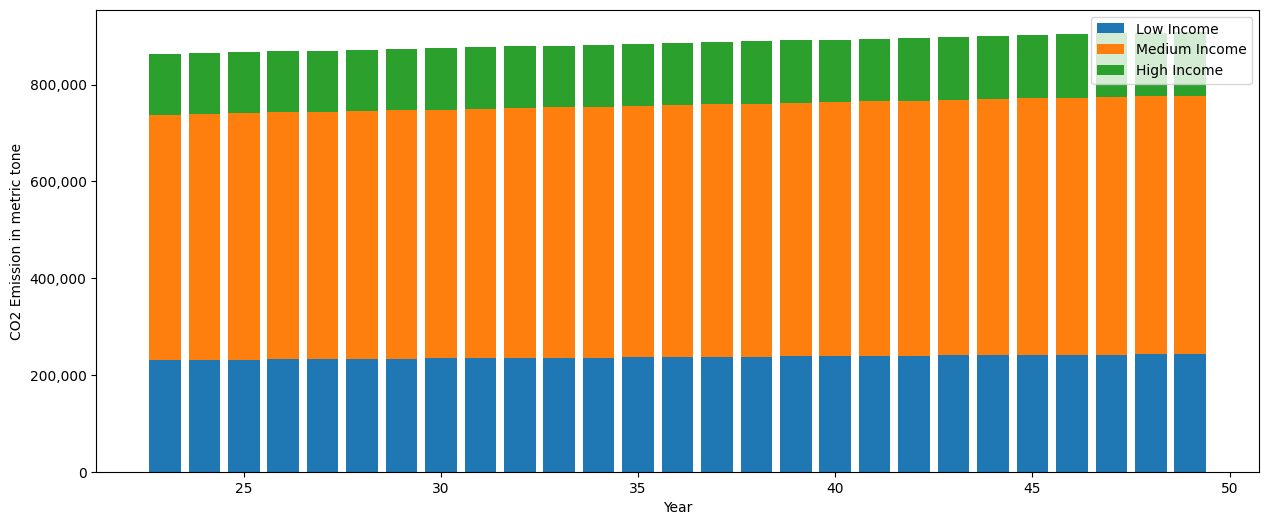

In [38]:
import numpy as np


# Creating the stacked bar chart
plt.figure(figsize=(15, 6))

# Plotting the bars
plt.bar(co2_emission_year, co2_emission_low_income, label='Low Income')
plt.bar(co2_emission_year, co2_emission_medium_income, label='Medium Income', bottom=co2_emission_low_income)
plt.bar(co2_emission_year, co2_emission_high_income, label='High Income', bottom=np.array(co2_emission_low_income) + np.array(co2_emission_medium_income))

# Create a formatter to display y-axis labels in hundreds with three digits
formatter = mticker.StrMethodFormatter("{x:,.0f}")

# Set the formatter for the y-axis tick labels
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('CO2 Emission in metric tone')
plt.legend()

# Displaying the graph
plt.show()

<h2>Co2 Emission by various industries from the year 1990-2022 </h2>

umweltbundesamt.de/en/data/environmental-indicators/indicator-greenhouse-gas-emissions#assessing-the-development 

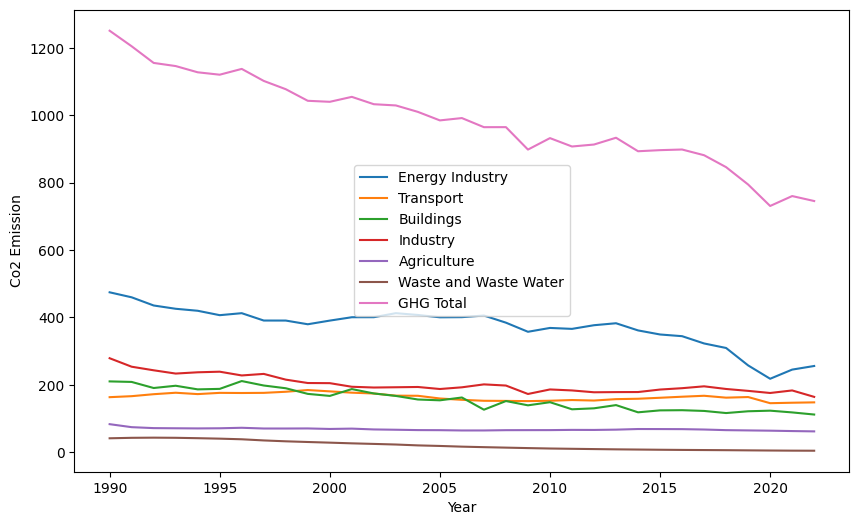

In [39]:
germany_data = pd.read_excel('/Users/mayank/Documents/co2germany.xlsx', sheet_name='Sheet1')
germany_data = germany_data[0:33]
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plotting the lines
plt.plot(germany_data['Year'], germany_data['Energy Industry'], label='Energy Industry')
plt.plot(germany_data['Year'], germany_data['Transport'], label='Transport')
plt.plot(germany_data['Year'], germany_data['Buildings'], label='Buildings')
plt.plot(germany_data['Year'], germany_data['Industry'], label='Industry')
plt.plot(germany_data['Year'], germany_data['Agriculture'], label='Agriculture')
plt.plot(germany_data['Year'], germany_data['Waste and Waste Water'], label='Waste and Waste Water')
plt.plot(germany_data['Year'], germany_data['GHG total'], label='GHG Total')


# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Co2 Emission')
plt.legend()

plt.show()

### Household vs Different Sector Co2 Emission

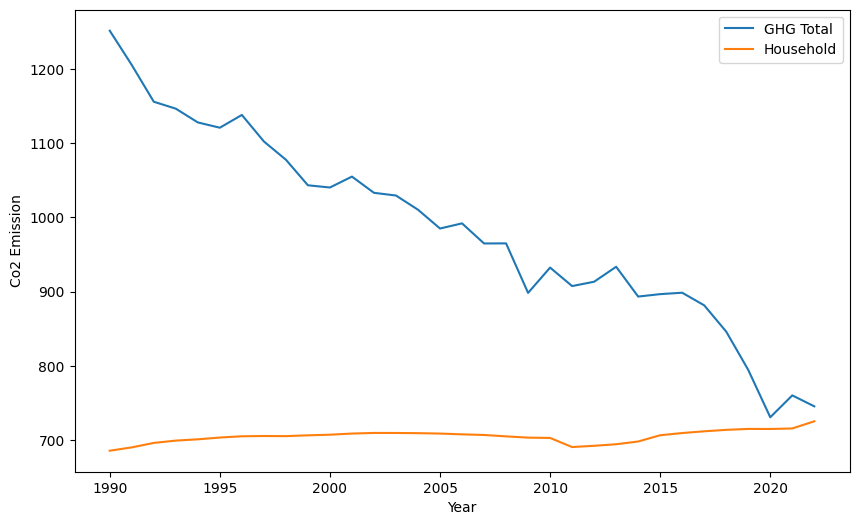

In [40]:
#co2 emission
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plotting the lines

plt.plot(germany_data['Year'][27:], germany_data['GHG total'][, label='GHG Total')
plt.plot(df['Date'], co2_emission_total_current, label='Household')


# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Co2 Emission')
plt.legend()

plt.show()

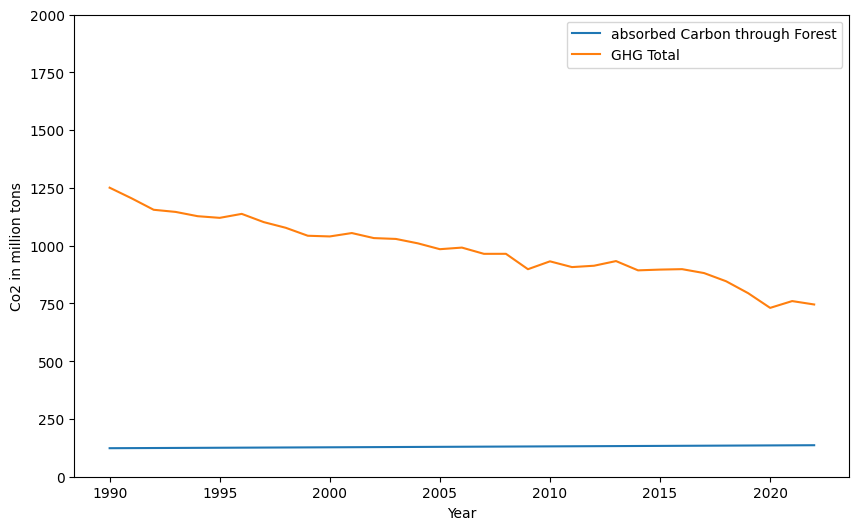

In [41]:
forest_area = 11.4 #million hectares https://www.deutschland.de/en/topic/environment/how-large-are-germanys-forests-facts-and-figures#:~:text=How%20much%20forest%20is%20there,with%20over%2090%20billion%20trees.
per_hectare_carbon_absorbed = 12 #tonnes per year https://www.researchgate.net/publication/329074041_Global_carbon_dioxide_removal_rates_from_forest_landscape_restoration_activities
rate_afforestration = 0.31  # https://rainforests.mongabay.com/deforestation/forest-information-archive/Germany.htm#:~:text=31.7%25%20%E2%80%94or%20about%2011%2C076%2C000%20hectares,annual%20reforestation%20rate%20of%200.31%25.
forest_area_2050 = []

# from year 1990 - 2023
for i in range(2023, 1990, -1):
    forest_area -= forest_area * (0.0031)
    forest_area_2050.append(forest_area)

total_carbon_absorbed = [x * per_hectare_carbon_absorbed for x in forest_area_2050]
total_carbon_absorbed = total_carbon_absorbed[::-1]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plotting the lines
plt.ylim(0, 2000)
plt.plot(germany_data['Year'], total_carbon_absorbed, label='absorbed Carbon through Forest')
plt.plot(germany_data['Year'], germany_data['GHG total'], label='GHG Total')

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Co2 in million tons')
plt.legend()

plt.show()

# Energy Industry prediction/simulation 

In [42]:
germany_data[['Year', 'Energy Industry']]
target_year = 2050
current_year = 2022
currrent_year_co2_emission = germany_data[germany_data['Year'] == 2022]['Energy Industry'].values
annual_reduction_rate = -4/100 #in percentage
total_number_years_needed = target_year - current_year
year_df = []
future_data_energy = [currrent_year_co2_emission]
for year in range(1, total_number_years_needed+1):
    currrent_year_co2_emission = currrent_year_co2_emission + (currrent_year_co2_emission * (annual_reduction_rate))
    year_df.append(current_year+year)
    future_data_energy.append(int(currrent_year_co2_emission))
future_data_energy = pd.DataFrame({'Energy Industry' : future_data_energy[1:], 'Year':year_df}  )

total_data_energy = pd.concat([germany_data[['Year', 'Energy Industry']], future_data_energy], ignore_index=True)


In [43]:
# transport
germany_data[['Year', 'Transport']]
target_year = 2050
current_year = 2022
currrent_year_co2_emission = germany_data[germany_data['Year'] == 2022]['Transport'].values
annual_reduction_rate = -5

total_number_years_needed = target_year - current_year


year_df = []
future_data_transport = [currrent_year_co2_emission]
for year in range(1, total_number_years_needed+1):
    currrent_year_co2_emission = currrent_year_co2_emission + (currrent_year_co2_emission * (annual_reduction_rate/100))
    year_df.append(current_year+year)
    future_data_transport.append(int(currrent_year_co2_emission))
future_data_transport = pd.DataFrame({'Transport' : future_data_transport[1:], 'Year':year_df}  )

total_data_transport = pd.concat([germany_data[['Year', 'Transport']], future_data_transport], ignore_index=True)

In [44]:
# buildings
germany_data[['Year', 'Buildings']]
target_year = 2050
current_year = 2022
currrent_year_co2_emission = germany_data[germany_data['Year'] == 2022]['Buildings'].values
annual_reduction_rate = -5

total_number_years_needed = target_year - current_year


year_df = []
future_data_buildings = [currrent_year_co2_emission]
for year in range(1, total_number_years_needed+1):
    currrent_year_co2_emission = currrent_year_co2_emission + (currrent_year_co2_emission * (annual_reduction_rate/100))
    year_df.append(current_year+year)
    future_data_buildings.append(int(currrent_year_co2_emission))
future_data_buildings = pd.DataFrame({'Buildings' : future_data_buildings[1:], 'Year':year_df}  )

total_data_buildings = pd.concat([germany_data[['Year', 'Buildings']], future_data_buildings], ignore_index=True)


In [45]:
# industry
germany_data[['Year', 'Industry']]
target_year = 2050
current_year = 2022
currrent_year_co2_emission = germany_data[germany_data['Year'] == 2022]['Industry'].values
annual_reduction_rate = -2

total_number_years_needed = target_year - current_year


year_df = []
future_data_industry = [currrent_year_co2_emission]
for year in range(1, total_number_years_needed+1):
    currrent_year_co2_emission = currrent_year_co2_emission + (currrent_year_co2_emission * (annual_reduction_rate/100))
    year_df.append(current_year+year)
    future_data_industry.append(int(currrent_year_co2_emission))
future_data_industry = pd.DataFrame({'Industry' : future_data_industry[1:], 'Year':year_df}  )

total_data_industry = pd.concat([germany_data[['Year', 'Industry']], future_data_industry], ignore_index=True)

In [46]:
# Agriculture
germany_data[['Year', 'Agriculture']]
target_year = 2050
current_year = 2022
currrent_year_co2_emission = germany_data[germany_data['Year'] == 2022]['Agriculture'].values
annual_reduction_rate = -2
total_number_years_needed = target_year - current_year

year_df = []
future_data_agriculture = [currrent_year_co2_emission]
for year in range(1, total_number_years_needed+1):
    currrent_year_co2_emission = currrent_year_co2_emission + (currrent_year_co2_emission * (annual_reduction_rate/100))
    year_df.append(current_year+year)
    future_data_agriculture.append(int(currrent_year_co2_emission))
future_data_agriculture = pd.DataFrame({'Agriculture': future_data_agriculture[1:], 'Year':year_df}  )

total_data_agriculture = pd.concat([germany_data[['Year', 'Agriculture']], future_data_agriculture], ignore_index=True)

In [47]:
# Waste and Waste Water
germany_data[['Year', 'Waste and Waste Water']]
target_year = 2050
current_year = 2022
currrent_year_co2_emission = germany_data[germany_data['Year'] == 2022]['Waste and Waste Water'].values
annual_reduction_rate = -1

total_number_years_needed = target_year - current_year

year_df = []
future_data_WW = [currrent_year_co2_emission]
for year in range(1, total_number_years_needed+1):
    currrent_year_co2_emission = currrent_year_co2_emission + (currrent_year_co2_emission * (annual_reduction_rate/100))
    year_df.append(current_year+year)
    future_data_WW.append(int(currrent_year_co2_emission))
future_data_WW = pd.DataFrame({'Waste and Waste Water' : future_data_WW[1:], 'Year':year_df}  )
total_data_WW = pd.concat([germany_data[['Year', 'Waste and Waste Water']], future_data_WW], ignore_index=True)
total_data_WW

,Year,Waste and Waste Water
0,1990,41.208891
1,1991,42.608214
2,1992,43.072003
3,1993,42.650102
4,1994,41.491835
...,...,...
56,2046,3.000000
57,2047,3.000000
58,2048,3.000000
59,2049,3.000000


### Total Co2 Emission with certain set parameters from 2019 - 2050

In [48]:
df_total_final = pd.concat([total_data_WW, total_data_agriculture, total_data_buildings, total_data_transport, total_data_industry, total_data_energy], axis=1)
df_total_final['GHG total'] = df_total_final['Waste and Waste Water'] + df_total_final['Agriculture']+df_total_final['Energy Industry'] + df_total_final['Transport'] + df_total_final['Buildings']
df_total_final = df_total_final.loc[:, ~df_total_final.columns.duplicated()]

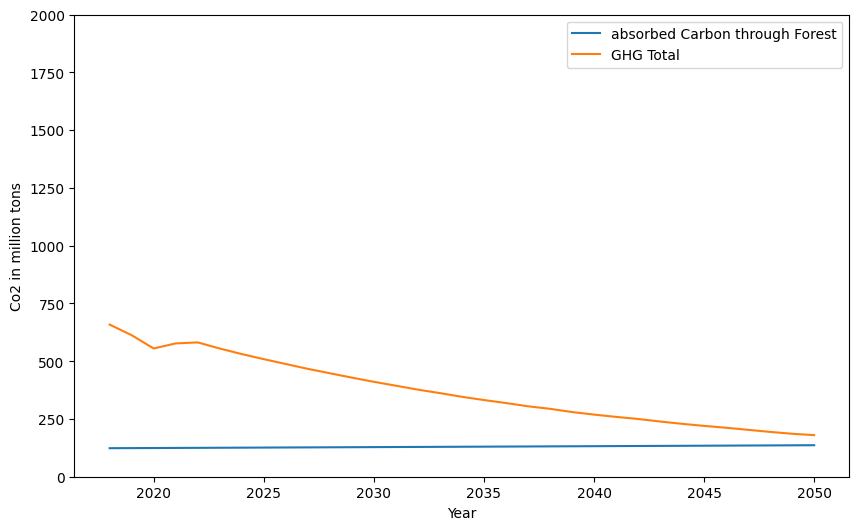

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plotting the lines
plt.ylim(0, 2000)
plt.plot(total_data_WW['Year'][28:], total_carbon_absorbed, label='absorbed Carbon through Forest')
plt.plot(total_data_WW['Year'][28:], df_total_final['GHG total'][28:], label='GHG Total')

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Co2 in million tons')
plt.legend()

plt.show()

### World Temperature Source NASA

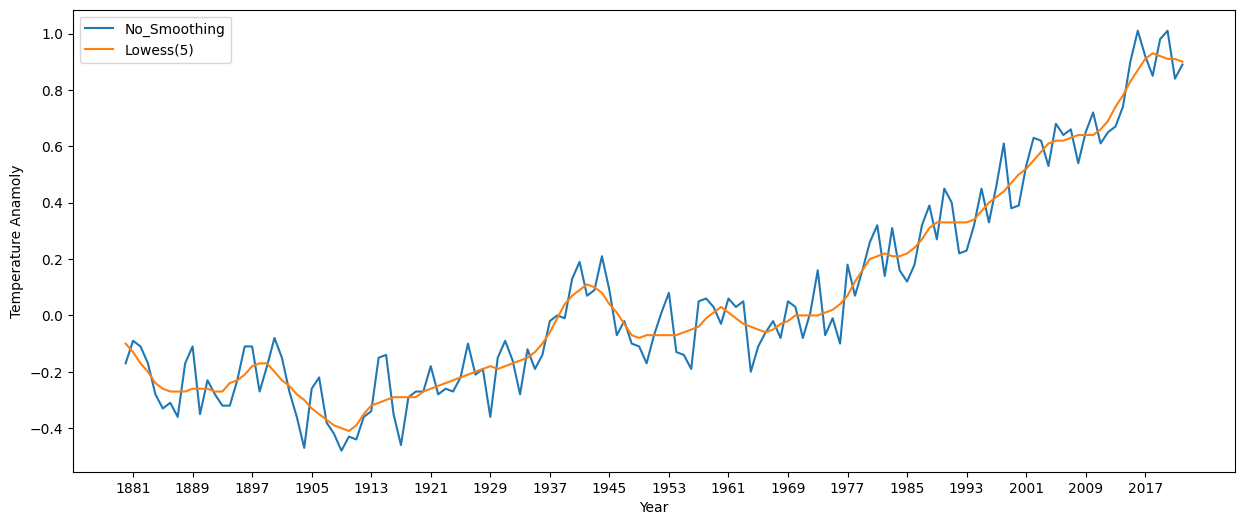

In [50]:
import pandas as pd
world_temperature = pd.read_csv('/Users/mayank/Documents/world_Temp.txt', skiprows=[0,1],sep='\s+' )
world_temperature = world_temperature[1:]
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
# Plotting the lines
plt.plot(world_temperature['Year'], world_temperature['No_Smoothing'], label='No_Smoothing')
plt.plot(world_temperature['Year'], world_temperature['Lowess(5)'], label='Lowess(5)')

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Temperature Anamoly')
plt.legend()
plt.xticks(world_temperature.index[::8])

plt.show()


In [51]:
from collections import Counter

def first_non_repeated(s):
    char_count = Counter(s)
    print(char_count)
    for char in s:
        if char_count[char] == 1:
            return char
    return None

# Test
print(first_non_repeated("hello"))   # Output: "h"

Counter({'l': 2, 'h': 1, 'e': 1, 'o': 1})
h


[1]
